# CT7160NI Computer Vision Coursework
## 01 - Data Exploration & Preprocessing

**Project:** Deep Learning-Based Plant Species Classification  
**Dataset:** Oxford 102 Flower Dataset  
**Author:** [Your Name]  
**Date:** [Date]

---

This notebook performs exploratory data analysis (EDA) on the Oxford 102 Flower Dataset.

### Contents
1. Import Libraries
2. Dataset Overview
3. Load Dataset Information
4. Class Distribution Analysis
5. Sample Images Visualization
6. Image Size Analysis
7. Summary Statistics


In [19]:
# Import Libraries
import os
import sys
import numpy as np
import pandas as pd
from pathlib import Path
from collections import Counter

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image

# PyTorch
import torch
import torchvision

# SciPy for .mat file loading
import scipy.io as sio

# Set style
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette('husl')

# Add src to path
sys.path.append('../src')

print(f"PyTorch version: {torch.__version__}")
print(f"CUDA available: {torch.cuda.is_available()}")


PyTorch version: 2.5.1+cu121
CUDA available: True


In [20]:
# Define paths
DATA_DIR = Path('../data/raw/oxford_flowers_102')
JPG_DIR = DATA_DIR / '102flowers' / 'jpg'  # Images are in 102flowers/jpg/
LABELS_PATH = DATA_DIR / 'imagelabels.mat'
SPLITS_PATH = DATA_DIR / 'setid.mat'

# Check if dataset exists
print("Checking dataset files...")
print(f"Data directory exists: {DATA_DIR.exists()}")
print(f"JPG directory exists: {JPG_DIR.exists()}")
print(f"Labels file exists: {LABELS_PATH.exists()}")
print(f"Splits file exists: {SPLITS_PATH.exists()}")

if not DATA_DIR.exists():
    print("\n⚠️ Dataset not found! Please download from:")
    print("https://www.robots.ox.ac.uk/~vgg/data/flowers/102/")
    print("\nDownload these files:")
    print("1. 102flowers.tgz (images)")
    print("2. imagelabels.mat (labels)")
    print("3. setid.mat (train/val/test splits)")
elif not JPG_DIR.exists():
    print(f"\n⚠️ Images directory not found at: {JPG_DIR}")
    print("Expected structure: data/raw/oxford_flowers_102/102flowers/jpg/")


Checking dataset files...
Data directory exists: True
JPG directory exists: True
Labels file exists: True
Splits file exists: True


In [21]:
# Load labels and splits (run only if dataset exists)
# Load labels (1-indexed in .mat file, convert to 0-indexed)
labels_mat = sio.loadmat(LABELS_PATH)
all_labels = labels_mat['labels'].flatten() - 1  # Convert from 1-102 to 0-101

# Load split indices from setid.mat (1-indexed, convert to 0-indexed)
splits_mat = sio.loadmat(SPLITS_PATH)
train_ids = splits_mat['trnid'].flatten() - 1  # Convert from 1-indexed to 0-indexed
val_ids = splits_mat['valid'].flatten() - 1
test_ids = splits_mat['tstid'].flatten() - 1

# Verify indexing
print(f"Total images in dataset: {len(all_labels)}")
print(f"Number of classes: {len(np.unique(all_labels))}")
print(f"Classes range: {all_labels.min()} to {all_labels.max()}")
print(f"\nSplit sizes (using predefined splits from setid.mat):")
print(f"  Training: {len(train_ids)} images")
print(f"  Validation: {len(val_ids)} images")
print(f"  Test: {len(test_ids)} images")
print(f"  Total: {len(train_ids) + len(val_ids) + len(test_ids)} images")


Total images in dataset: 8189
Number of classes: 102
Classes range: 0 to 101

Split sizes (using predefined splits from setid.mat):
  Training: 1020 images
  Validation: 1020 images
  Test: 6149 images
  Total: 8189 images


In [22]:
# Class Distribution Analysis
# Get labels for each split using the image indices
# train_ids, val_ids, test_ids are 0-indexed image indices into all_labels array
train_labels = all_labels[train_ids]  # Get labels for training images
val_labels = all_labels[val_ids]      # Get labels for validation images  
test_labels = all_labels[test_ids]    # Get labels for test images

train_counts = Counter(train_labels)
val_counts = Counter(val_labels)
test_counts = Counter(test_labels)

# Create DataFrame for analysis
class_dist_df = pd.DataFrame({
    'Class': range(102),
    'Train': [train_counts.get(i, 0) for i in range(102)],
    'Val': [val_counts.get(i, 0) for i in range(102)],
    'Test': [test_counts.get(i, 0) for i in range(102)]
})
class_dist_df['Total'] = class_dist_df['Train'] + class_dist_df['Val'] + class_dist_df['Test']

print("Class Distribution Summary:")
print(f"\nTraining set:")
print(f"  Total images: {len(train_labels)}")
print(f"  Classes present: {len(train_counts)}")
print(f"  Min samples per class: {min(train_counts.values())}")
print(f"  Max samples per class: {max(train_counts.values())}")
print(f"  Mean samples per class: {np.mean(list(train_counts.values())):.1f}")
print(f"  Median samples per class: {np.median(list(train_counts.values())):.1f}")

print(f"\nValidation set:")
print(f"  Total images: {len(val_labels)}")
print(f"  Classes present: {len(val_counts)}")
print(f"  Min samples per class: {min(val_counts.values())}")
print(f"  Max samples per class: {max(val_counts.values())}")
print(f"  Mean samples per class: {np.mean(list(val_counts.values())):.1f}")

print(f"\nTest set:")
print(f"  Total images: {len(test_labels)}")
print(f"  Classes present: {len(test_counts)}")
print(f"  Min samples per class: {min(test_counts.values())}")
print(f"  Max samples per class: {max(test_counts.values())}")
print(f"  Mean samples per class: {np.mean(list(test_counts.values())):.1f}")

print(f"\nOverall:")
print(f"  Total images: {len(all_labels)}")
print(f"  Classes: {len(np.unique(all_labels))}")
print(f"  Min samples per class: {min(class_dist_df['Total'])}")
print(f"  Max samples per class: {max(class_dist_df['Total'])}")
print(f"  Mean samples per class: {class_dist_df['Total'].mean():.1f}")
print(f"  Median samples per class: {class_dist_df['Total'].median():.1f}")


Class Distribution Summary:

Training set:
  Total images: 1020
  Classes present: 102
  Min samples per class: 10
  Max samples per class: 10
  Mean samples per class: 10.0
  Median samples per class: 10.0

Validation set:
  Total images: 1020
  Classes present: 102
  Min samples per class: 10
  Max samples per class: 10
  Mean samples per class: 10.0

Test set:
  Total images: 6149
  Classes present: 102
  Min samples per class: 20
  Max samples per class: 238
  Mean samples per class: 60.3

Overall:
  Total images: 8189
  Classes: 102
  Min samples per class: 40
  Max samples per class: 258
  Mean samples per class: 80.3
  Median samples per class: 66.0


Class distribution plot saved to results/figures/class_distribution.png


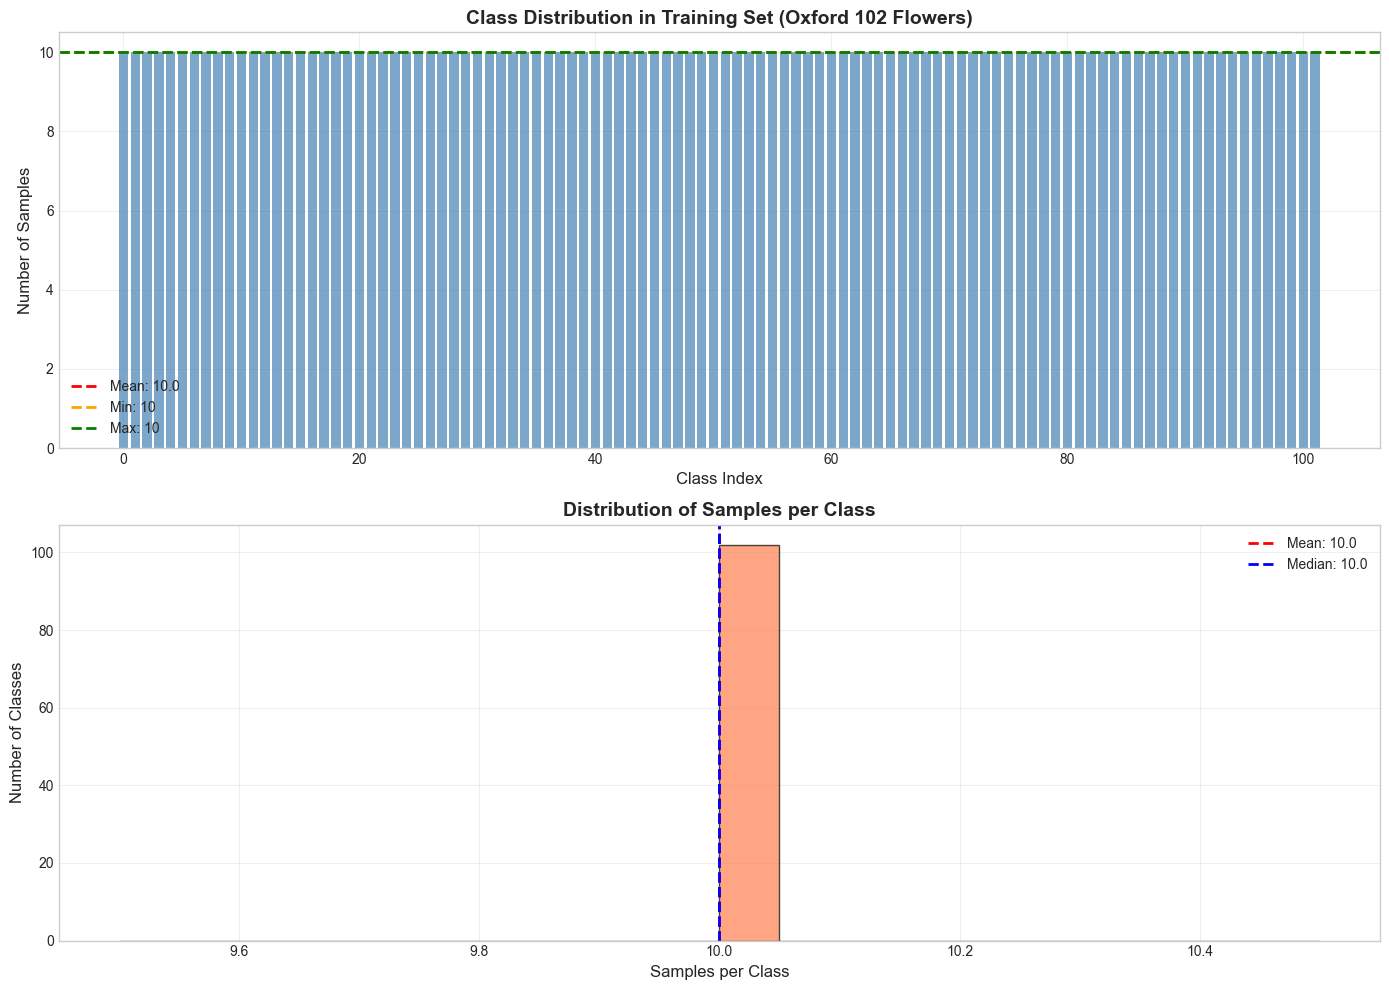

In [23]:
# Visualize Class Distribution
fig, axes = plt.subplots(2, 1, figsize=(14, 10))

# Plot 1: Class distribution bar chart for training set
train_counts_sorted = sorted(train_counts.items())
classes = [c[0] for c in train_counts_sorted]
counts = [c[1] for c in train_counts_sorted]

axes[0].bar(classes, counts, color='steelblue', alpha=0.7)
axes[0].axhline(y=np.mean(counts), color='red', linestyle='--', linewidth=2, label=f'Mean: {np.mean(counts):.1f}')
axes[0].axhline(y=min(counts), color='orange', linestyle='--', linewidth=2, label=f'Min: {min(counts)}')
axes[0].axhline(y=max(counts), color='green', linestyle='--', linewidth=2, label=f'Max: {max(counts)}')
axes[0].set_xlabel('Class Index', fontsize=12)
axes[0].set_ylabel('Number of Samples', fontsize=12)
axes[0].set_title('Class Distribution in Training Set (Oxford 102 Flowers)', fontsize=14, fontweight='bold')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Plot 2: Histogram of samples per class
axes[1].hist(counts, bins=20, color='coral', edgecolor='black', alpha=0.7)
axes[1].axvline(x=np.mean(counts), color='red', linestyle='--', linewidth=2, label=f'Mean: {np.mean(counts):.1f}')
axes[1].axvline(x=np.median(counts), color='blue', linestyle='--', linewidth=2, label=f'Median: {np.median(counts):.1f}')
axes[1].set_xlabel('Samples per Class', fontsize=12)
axes[1].set_ylabel('Number of Classes', fontsize=12)
axes[1].set_title('Distribution of Samples per Class', fontsize=14, fontweight='bold')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('../results/figures/class_distribution.png', dpi=300, bbox_inches='tight')
print("Class distribution plot saved to results/figures/class_distribution.png")
plt.show()


Sample images plot saved to results/figures/sample_images.png


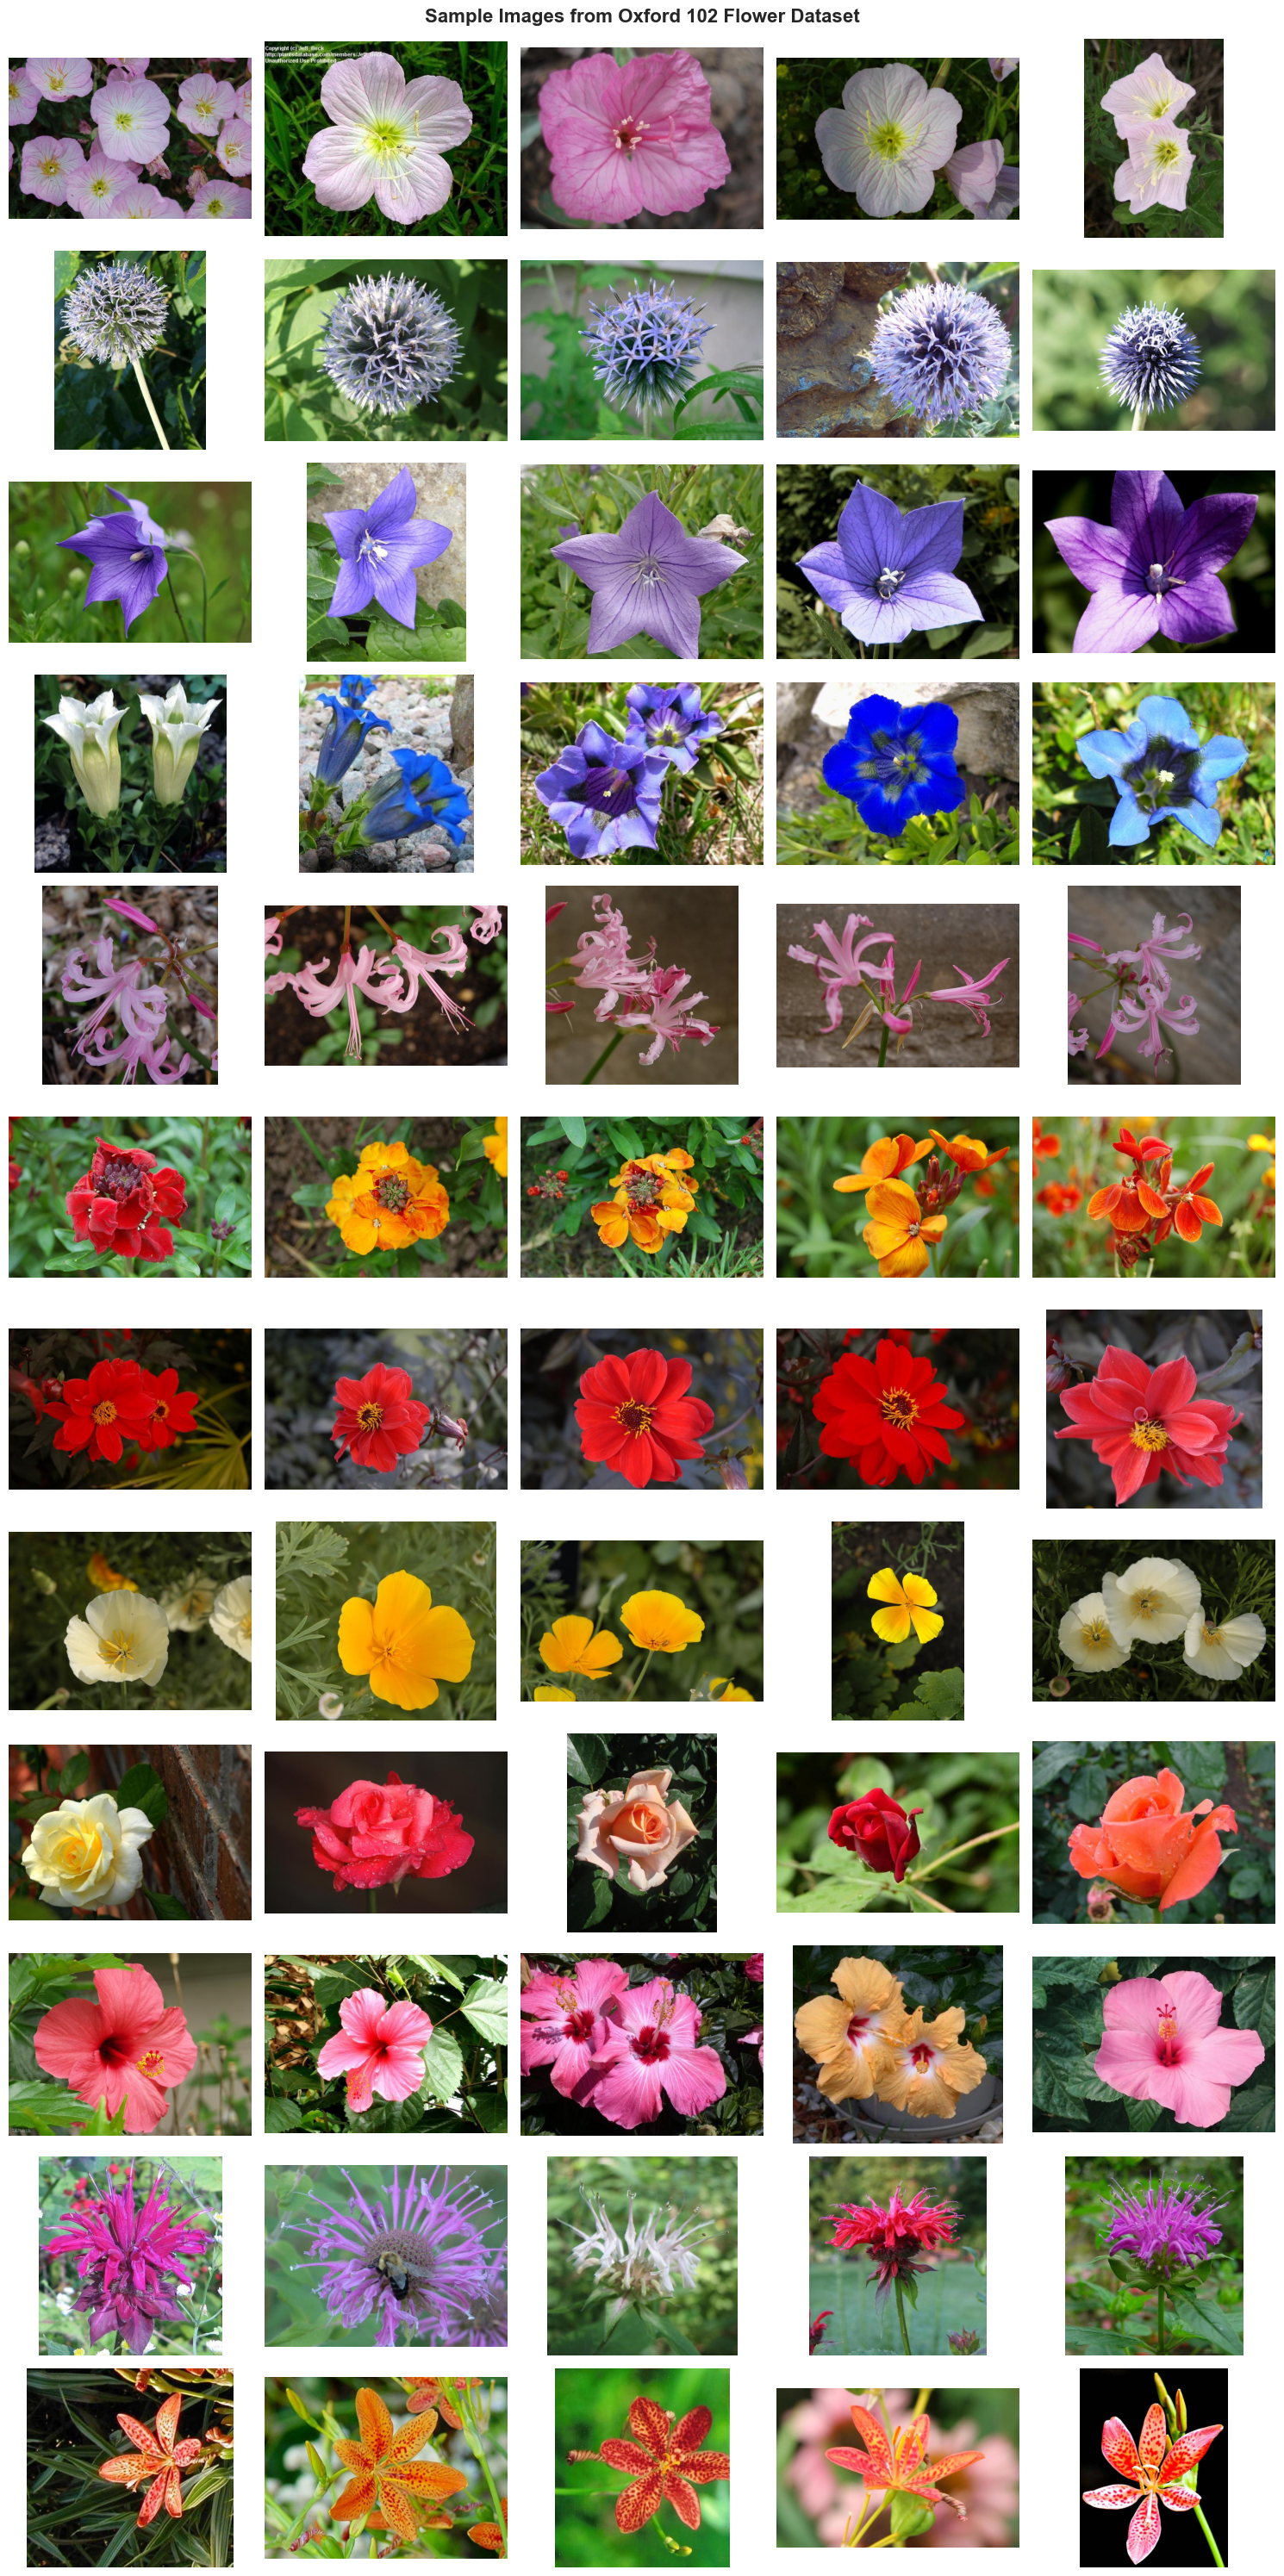

In [24]:
# Sample Images Visualization
# Display sample images from different classes
num_samples_per_class = 5
num_classes_to_show = 12

# Select classes to display (evenly spaced)
classes_to_show = np.linspace(0, 101, num_classes_to_show, dtype=int)

fig, axes = plt.subplots(num_classes_to_show, num_samples_per_class, figsize=(15, num_classes_to_show * 2.5))
fig.suptitle('Sample Images from Oxford 102 Flower Dataset', fontsize=16, fontweight='bold', y=0.995)

for class_idx, class_id in enumerate(classes_to_show):
    # Find images of this class in training set
    # train_labels is indexed by position in train_ids array
    class_indices_in_train = [i for i, label in enumerate(train_labels) if label == class_id]
    
    if len(class_indices_in_train) > 0:
        # Select up to num_samples_per_class images
        selected_train_indices = class_indices_in_train[:num_samples_per_class]
        
        for img_idx, train_pos in enumerate(selected_train_indices):
            # Get the actual image index in the full dataset
            actual_idx = train_ids[train_pos]
            img_name = f"image_{actual_idx + 1:05d}.jpg"
            img_path = JPG_DIR / img_name
            
            if img_path.exists():
                img = Image.open(img_path)
                axes[class_idx, img_idx].imshow(img)
                axes[class_idx, img_idx].axis('off')
                if img_idx == 0:
                    axes[class_idx, img_idx].set_ylabel(f'Class {class_id}\n({len(class_indices_in_train)} samples)', 
                                                        fontsize=10, fontweight='bold')
            else:
                axes[class_idx, img_idx].text(0.5, 0.5, 'Image\nNot Found', 
                                             ha='center', va='center', fontsize=10)
                axes[class_idx, img_idx].axis('off')
    else:
        # No images found for this class
        for img_idx in range(num_samples_per_class):
            axes[class_idx, img_idx].text(0.5, 0.5, 'No Samples', 
                                         ha='center', va='center', fontsize=10)
            axes[class_idx, img_idx].axis('off')
        axes[class_idx, 0].set_ylabel(f'Class {class_id}\n(0 samples)', 
                                     fontsize=10, fontweight='bold')

plt.tight_layout()
plt.savefig('../results/figures/sample_images.png', dpi=150, bbox_inches='tight')
print("Sample images plot saved to results/figures/sample_images.png")
plt.show()


In [25]:
# Image Size Analysis
# Analyze image dimensions
print("Analyzing image dimensions...")
image_sizes = []
sample_size = min(1000, len(train_ids))  # Sample up to 1000 images for speed

for i, idx in enumerate(train_ids[:sample_size]):
    img_name = f"image_{idx + 1:05d}.jpg"
    img_path = JPG_DIR / img_name
    
    if img_path.exists():
        try:
            img = Image.open(img_path)
            image_sizes.append(img.size)  # (width, height)
        except Exception as e:
            print(f"Error loading {img_name}: {e}")
    
    if (i + 1) % 100 == 0:
        print(f"  Processed {i + 1}/{sample_size} images...")

if image_sizes:
    widths = [size[0] for size in image_sizes]
    heights = [size[1] for size in image_sizes]
    areas = [w * h for w, h in image_sizes]
    aspect_ratios = [w / h for w, h in image_sizes]
    
    print(f"\nImage Size Statistics (from {len(image_sizes)} sampled images):")
    print(f"\nWidth:")
    print(f"  Min: {min(widths)}px")
    print(f"  Max: {max(widths)}px")
    print(f"  Mean: {np.mean(widths):.1f}px")
    print(f"  Median: {np.median(widths):.1f}px")
    
    print(f"\nHeight:")
    print(f"  Min: {min(heights)}px")
    print(f"  Max: {max(heights)}px")
    print(f"  Mean: {np.mean(heights):.1f}px")
    print(f"  Median: {np.median(heights):.1f}px")
    
    print(f"\nArea (Width × Height):")
    print(f"  Min: {min(areas):,}px²")
    print(f"  Max: {max(areas):,}px²")
    print(f"  Mean: {np.mean(areas):,.0f}px²")
    print(f"  Median: {np.median(areas):,.0f}px²")
    
    print(f"\nAspect Ratio (Width/Height):")
    print(f"  Min: {min(aspect_ratios):.2f}")
    print(f"  Max: {max(aspect_ratios):.2f}")
    print(f"  Mean: {np.mean(aspect_ratios):.2f}")
    print(f"  Median: {np.median(aspect_ratios):.2f}")
else:
    print("No images found for size analysis.")


Analyzing image dimensions...
  Processed 100/1000 images...
  Processed 200/1000 images...
  Processed 300/1000 images...
  Processed 400/1000 images...
  Processed 500/1000 images...
  Processed 600/1000 images...
  Processed 700/1000 images...
  Processed 800/1000 images...
  Processed 900/1000 images...
  Processed 1000/1000 images...

Image Size Statistics (from 1000 sampled images):

Width:
  Min: 500px
  Max: 919px
  Mean: 625.0px
  Median: 666.0px

Height:
  Min: 500px
  Max: 993px
  Mean: 537.5px
  Median: 500.0px

Area (Width × Height):
  Min: 250,000px²
  Max: 496,500px²
  Mean: 331,246px²
  Median: 333,500px²

Aspect Ratio (Width/Height):
  Min: 0.50
  Max: 1.84
  Mean: 1.20
  Median: 1.33


Image size analysis plot saved to results/figures/image_size_analysis.png


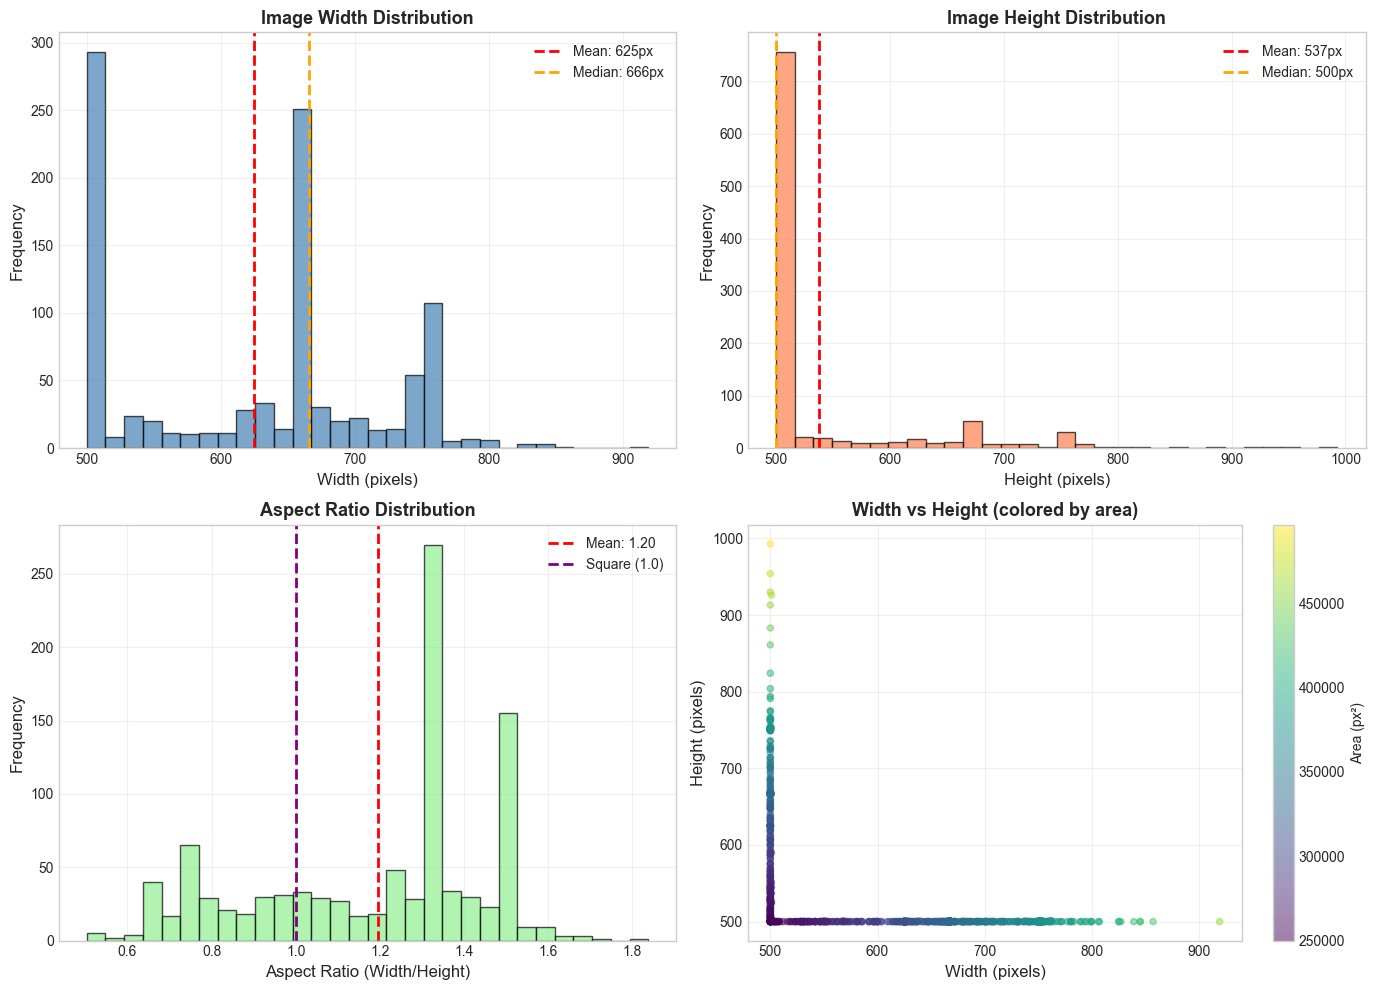

In [26]:
# Visualize Image Size Distribution
if image_sizes:
    fig, axes = plt.subplots(2, 2, figsize=(14, 10))
    
    # Plot 1: Width distribution
    axes[0, 0].hist(widths, bins=30, color='steelblue', edgecolor='black', alpha=0.7)
    axes[0, 0].axvline(x=np.mean(widths), color='red', linestyle='--', linewidth=2, label=f'Mean: {np.mean(widths):.0f}px')
    axes[0, 0].axvline(x=np.median(widths), color='orange', linestyle='--', linewidth=2, label=f'Median: {np.median(widths):.0f}px')
    axes[0, 0].set_xlabel('Width (pixels)', fontsize=12)
    axes[0, 0].set_ylabel('Frequency', fontsize=12)
    axes[0, 0].set_title('Image Width Distribution', fontsize=13, fontweight='bold')
    axes[0, 0].legend()
    axes[0, 0].grid(True, alpha=0.3)
    
    # Plot 2: Height distribution
    axes[0, 1].hist(heights, bins=30, color='coral', edgecolor='black', alpha=0.7)
    axes[0, 1].axvline(x=np.mean(heights), color='red', linestyle='--', linewidth=2, label=f'Mean: {np.mean(heights):.0f}px')
    axes[0, 1].axvline(x=np.median(heights), color='orange', linestyle='--', linewidth=2, label=f'Median: {np.median(heights):.0f}px')
    axes[0, 1].set_xlabel('Height (pixels)', fontsize=12)
    axes[0, 1].set_ylabel('Frequency', fontsize=12)
    axes[0, 1].set_title('Image Height Distribution', fontsize=13, fontweight='bold')
    axes[0, 1].legend()
    axes[0, 1].grid(True, alpha=0.3)
    
    # Plot 3: Aspect ratio distribution
    axes[1, 0].hist(aspect_ratios, bins=30, color='lightgreen', edgecolor='black', alpha=0.7)
    axes[1, 0].axvline(x=np.mean(aspect_ratios), color='red', linestyle='--', linewidth=2, label=f'Mean: {np.mean(aspect_ratios):.2f}')
    axes[1, 0].axvline(x=1.0, color='purple', linestyle='--', linewidth=2, label='Square (1.0)')
    axes[1, 0].set_xlabel('Aspect Ratio (Width/Height)', fontsize=12)
    axes[1, 0].set_ylabel('Frequency', fontsize=12)
    axes[1, 0].set_title('Aspect Ratio Distribution', fontsize=13, fontweight='bold')
    axes[1, 0].legend()
    axes[1, 0].grid(True, alpha=0.3)
    
    # Plot 4: Width vs Height scatter
    scatter = axes[1, 1].scatter(widths, heights, alpha=0.5, s=20, c=areas, cmap='viridis')
    axes[1, 1].set_xlabel('Width (pixels)', fontsize=12)
    axes[1, 1].set_ylabel('Height (pixels)', fontsize=12)
    axes[1, 1].set_title('Width vs Height (colored by area)', fontsize=13, fontweight='bold')
    plt.colorbar(scatter, ax=axes[1, 1], label='Area (px²)')
    axes[1, 1].grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.savefig('../results/figures/image_size_analysis.png', dpi=300, bbox_inches='tight')
    print("Image size analysis plot saved to results/figures/image_size_analysis.png")
    plt.show()
else:
    print("Skipping visualization - no image size data available.")


## Summary Statistics

Below is a comprehensive summary of the dataset characteristics.


In [27]:
# Summary Statistics
print("="*70)
print("OXFORD 102 FLOWER DATASET - SUMMARY STATISTICS")
print("="*70)

print(f"\n DATASET OVERVIEW:")
print(f"  Total Images: {len(all_labels):,}")
print(f"  Number of Classes: {len(np.unique(all_labels))}")
print(f"  Classes: 0 to {len(np.unique(all_labels)) - 1}")

print(f"\n DATA SPLITS:")
print(f"  Training Set:   {len(train_ids):,} images ({len(train_ids)/len(all_labels)*100:.1f}%)")
print(f"  Validation Set: {len(val_ids):,} images ({len(val_ids)/len(all_labels)*100:.1f}%)")
print(f"  Test Set:       {len(test_ids):,} images ({len(test_ids)/len(all_labels)*100:.1f}%)")

print(f"\n CLASS DISTRIBUTION (Training Set):")
train_class_counts = list(train_counts.values())
print(f"  Samples per class - Min: {min(train_class_counts)}")
print(f"  Samples per class - Max: {max(train_class_counts)}")
print(f"  Samples per class - Mean: {np.mean(train_class_counts):.1f}")
print(f"  Samples per class - Median: {np.median(train_class_counts):.1f}")
print(f"  Samples per class - Std Dev: {np.std(train_class_counts):.1f}")
print(f"  Class Imbalance Ratio (Max/Min): {max(train_class_counts)/min(train_class_counts):.2f}")

if image_sizes:
    print(f"\n  IMAGE CHARACTERISTICS (from {len(image_sizes)} sampled images):")
    print(f"  Dimensions - Width: {min(widths)} to {max(widths)}px (mean: {np.mean(widths):.0f}px)")
    print(f"  Dimensions - Height: {min(heights)} to {max(heights)}px (mean: {np.mean(heights):.0f}px)")
    print(f"  Aspect Ratio: {min(aspect_ratios):.2f} to {max(aspect_ratios):.2f} (mean: {np.mean(aspect_ratios):.2f})")
    print(f"  Most common size: {max(set(image_sizes), key=image_sizes.count)}")

print(f"\n KEY OBSERVATIONS:")
print(f"  1. Dataset contains {len(np.unique(all_labels))} fine-grained flower categories")
print(f"  2. Class distribution shows imbalance (ratio: {max(train_class_counts)/min(train_class_counts):.2f}x)")
if image_sizes:
    print(f"  3. Images have variable dimensions (recommend resizing to standard size)")
    print(f"  4. Most images are approximately square (aspect ratio ~ {np.mean(aspect_ratios):.2f})")
print(f"  5. Standard train/val/test split is available from the dataset")

print("\n" + "="*70)
print("Data exploration complete! ✓")
print("="*70)


OXFORD 102 FLOWER DATASET - SUMMARY STATISTICS

 DATASET OVERVIEW:
  Total Images: 8,189
  Number of Classes: 102
  Classes: 0 to 101

 DATA SPLITS:
  Training Set:   1,020 images (12.5%)
  Validation Set: 1,020 images (12.5%)
  Test Set:       6,149 images (75.1%)

 CLASS DISTRIBUTION (Training Set):
  Samples per class - Min: 10
  Samples per class - Max: 10
  Samples per class - Mean: 10.0
  Samples per class - Median: 10.0
  Samples per class - Std Dev: 0.0
  Class Imbalance Ratio (Max/Min): 1.00

  IMAGE CHARACTERISTICS (from 1000 sampled images):
  Dimensions - Width: 500 to 919px (mean: 625px)
  Dimensions - Height: 500 to 993px (mean: 537px)
  Aspect Ratio: 0.50 to 1.84 (mean: 1.20)
  Most common size: (667, 500)

 KEY OBSERVATIONS:
  1. Dataset contains 102 fine-grained flower categories
  2. Class distribution shows imbalance (ratio: 1.00x)
  3. Images have variable dimensions (recommend resizing to standard size)
  4. Most images are approximately square (aspect ratio ~ 1.20

---

## Next Steps

Based on this exploration, the following preprocessing steps are recommended:

1. **Resize all images** to a standard size (e.g., 224×224 or 256×256) for CNN input
2. **Address class imbalance** using:
   - Weighted loss function
   - Data augmentation for underrepresented classes
   - Class-balanced sampling strategies
3. **Data augmentation** to increase training data diversity:
   - Random rotations, flips, crops
   - Color jittering
   - Random affine transformations
4. **Normalization** using ImageNet statistics for transfer learning models

These steps will be implemented in the preprocessing pipeline.
